# Reinforcement Learning Notwbook

In [1]:
from RobotEnvClass import Q_Learning, SARSA_learning, Q_Learning_Randomness
import numpy as np
import matplotlib.pyplot as plt

## Create tiny grid to test


                    

In [2]:
q_learning = Q_Learning(dims=(3,3),
                        rewards={'r_time':-1, 'r_pond':-5, 'r_croissant':5, 'r_cogs':5, 'r_work':10},
                        start=(0,0),
                        end=(2,2),
                        positions={'pond':[(1,0)], 'cogs':[(2,0)], 'croissant': [(0,2)]},
                        tubes=[[(1,2),(2,1)]],
                        walls=[[(0, 1), (0, 2)]],
                        max_steps=100,
                        max_episodes=10
                       )

In [3]:
st = q_learning.visualise_world()
print(st)


X  X  X  X  X  X  X  
X  S     .  X  C  X  
X                 X  
X  P     .     T0 X  
X                 X  
X  G     T0    E  X  
X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [4]:
q_learning.display_matrix(q_learning._R)

,0,1,2,3,4,5,6,7,8
0,NaN,-1.0,NaN,-5.0,NaN,NaN,NaN,NaN,NaN
1,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
2,NaN,-1.0,NaN,-5.0,NaN,-1.0,NaN,NaN,NaN
3,-1.0,NaN,5.0,-5.0,-1.0,NaN,5.0,NaN,NaN
4,NaN,-1.0,NaN,-5.0,NaN,-1.0,NaN,-1.0,NaN
5,NaN,NaN,5.0,NaN,-1.0,NaN,5.0,-1.0,10.0
6,NaN,NaN,NaN,-5.0,NaN,NaN,NaN,-1.0,NaN
7,NaN,NaN,NaN,NaN,-1.0,-1.0,5.0,NaN,10.0
8,NaN,NaN,5.0,NaN,NaN,-1.0,NaN,-1.0,10.0


## Q Learning

In [10]:
q_learning = Q_Learning()
q_learning.max_episodes = 5000
q_learning.rewards={'r_time':-1,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [11]:
st = q_learning.visualise_world()

print(st)


X  X  X  X  X  X  X  X  X  X  X  X  X  
X  T0    .     .  X  .     .     .  X  
X                                   X  
X  S     .     T1 X  .     C     .  X  
X                                X  X  
X  .     .     .  X  .     P     .  X  
X                                   X  
X  .     .     .     .     .     T0 X  
X  X     X                          X  
X  .     T1    .     P     .     .  X  
X                                   X  
X  .     .     G  X  .     .     E  X  
X  X  X  X  X  X  X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [12]:
q_learning.display_matrix(q_learning._R, start=0, end=13)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
6,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN
7,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0
8,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,30.0,NaN,NaN,NaN


In [5]:
%%time
Q, Rtot = q_learning.learn(1,0.8,0.9)

CPU times: user 15.2 s, sys: 45.2 ms, total: 15.3 s
Wall time: 15.3 s


In [5]:
q_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.000000,66.111111,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
26,52.688889,0.000000,32.888889,0.000000,0.0,0.000000,0.000000,82.888889,0.000000,0.000000,0.0
27,0.000000,66.111111,32.888889,41.951111,0.0,0.000000,0.000000,0.000000,66.111111,0.000000,0.0
28,0.000000,0.000000,32.888889,0.000000,39.8,0.000000,0.000000,0.000000,0.000000,52.688889,0.0
29,0.000000,0.000000,0.000000,41.951111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,50.0
30,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
31,52.688889,0.000000,0.000000,0.000000,0.0,52.688889,0.000000,82.888889,0.000000,0.000000,0.0
32,0.000000,66.111111,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
33,0.000000,0.000000,32.888889,0.000000,0.0,0.000000,0.000000,82.888889,0.000000,52.688889,0.0
34,0.000000,0.000000,0.000000,41.951111,0.0,0.000000,0.000000,0.000000,66.111111,0.000000,50.0


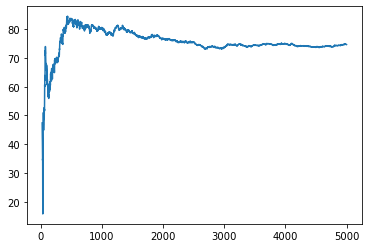

In [6]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

## Q Learning with some degree of randomness

In [7]:
q_learning_with_randomness = Q_Learning_Randomness()
q_learning_with_randomness.max_episodes = 5000
q_learning_with_randomness.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [8]:
%%time
Q, Rtot = q_learning_with_randomness.learn(1,0.8,0.9)

CPU times: user 14.1 s, sys: 83.8 ms, total: 14.2 s
Wall time: 14.2 s


In [9]:
q_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.0,15.8,0.0,0.0,0.0,0.0,19.8,0.0,0.0,0.0,0.0
26,24.6,0.0,1.6,0.0,0.0,0.0,0.0,54.8,0.0,0.0,0.0
27,0.0,25.4,2.4,21.4,0.0,0.0,0.0,0.0,27.0,0.0,0.0
28,0.0,0.0,0.8,0.0,22.2,0.0,0.0,0.0,0.0,27.8,0.0
29,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,77.2
30,0.0,0.0,0.0,0.0,0.0,0.0,19.8,0.0,0.0,0.0,0.0
31,20.6,0.0,0.0,0.0,0.0,24.6,0.0,50.8,0.0,0.0,0.0
32,0.0,15.8,0.0,0.0,0.0,0.0,23.8,0.0,0.0,0.0,0.0
33,0.0,0.0,6.4,0.0,0.0,0.0,0.0,50.8,0.0,27.8,0.0
34,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,27.0,0.0,77.2


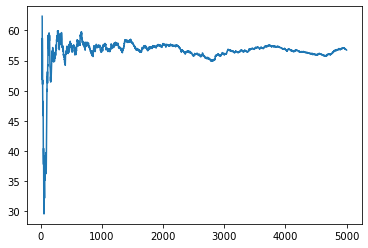

In [10]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

## SARSA algorithm

In [11]:
sarsa_learning = SARSA_learning()
sarsa_learning.max_episodes = 5000
sarsa_learning.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [12]:
%%time
Q, Rtot = sarsa_learning.learn(1,0.8,0.9)

CPU times: user 21.5 s, sys: 148 ms, total: 21.6 s
Wall time: 21.3 s


In [13]:
sarsa_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.000000,-6.331060,0.000000,0.000000,0.000000,0.000000,38.743461,0.000000,0.0000,0.00000,0.0
26,-1.146109,0.000000,10.994769,0.000000,0.000000,0.000000,0.000000,48.679327,0.0000,0.00000,0.0
27,0.000000,38.743461,-4.088320,-2.115037,0.000000,0.000000,0.000000,0.000000,19.8896,0.00000,0.0
28,0.000000,0.000000,-26.626896,0.000000,-14.300902,0.000000,0.000000,0.000000,0.0000,15.71168,0.0
29,0.000000,0.000000,0.000000,-17.626128,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,50.0
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.086564,0.000000,0.0000,0.00000,0.0
31,18.259288,0.000000,0.000000,0.000000,0.000000,7.858205,0.000000,31.522125,0.0000,0.00000,0.0
32,0.000000,-18.816525,0.000000,0.000000,0.000000,0.000000,14.407430,0.000000,0.0000,0.00000,0.0
33,0.000000,0.000000,5.312000,0.000000,0.000000,0.000000,0.000000,28.872353,0.0000,15.71168,0.0
34,0.000000,0.000000,0.000000,-26.978325,0.000000,0.000000,0.000000,0.000000,19.8896,0.00000,50.0


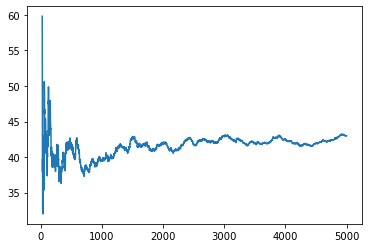

In [14]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

In [15]:
print('-')

-


In [16]:
st = ' '*10
st[5] = '-'
st[9] = '|'
print(st)

TypeError: 'str' object does not support item assignment

In [17]:
l = ['g','g','e','3','b']
''.join(l)

'gge3b'

In [18]:
l2 = ['.']
l2*6

['.', '.', '.', '.', '.', '.']